In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D4-Allyson/S2/Office_Allyson-S2.csv",index_col='timestamp')

In [10]:
len(df)

4320

In [11]:
train_data = df.iloc[:3600]
test_data = df.iloc[3600:]

In [12]:
len(train_data),len(test_data)

(3600, 720)

In [13]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [14]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [15]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [16]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [17]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
#X_train = np.reshape(X_train, (8016, seq_len, 1))
#X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [18]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (3576, 24)
y_train.shape =  (3576,)
X_test.shape =  (696, 24)
y_test.shape =  (696,)


In [19]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

In [20]:
input_layer = Input(shape=24, dtype='float32')
dense1 = Dense(24, activation='linear')(input_layer)
dense2 = Dense(18, activation='linear')(dense1)
dense3 = Dense(18, activation='linear')(dense2)
dropout_layer = Dropout(0.2)(dense2)
output_layer = Dense(1, activation='linear')(dropout_layer)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 24)                600       
                                                                 
 dense_1 (Dense)             (None, 18)                450       
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 19        
                                                                 
Total params: 1,069
Trainable params: 1,069
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=300)

Epoch 1/300
28/28 [==============================] - 1s 2ms/step - loss: 187.5701
Epoch 2/300
28/28 [==============================] - 0s 1ms/step - loss: 90.2192
Epoch 3/300
28/28 [==============================] - 0s 1ms/step - loss: 71.0480
Epoch 4/300
28/28 [==============================] - 0s 2ms/step - loss: 54.5279
Epoch 5/300
28/28 [==============================] - 0s 2ms/step - loss: 47.4400
Epoch 6/300
28/28 [==============================] - 0s 2ms/step - loss: 39.4203
Epoch 7/300
28/28 [==============================] - 0s 2ms/step - loss: 36.2613
Epoch 8/300
28/28 [==============================] - 0s 2ms/step - loss: 34.4033
Epoch 9/300
28/28 [==============================] - 0s 2ms/step - loss: 29.8584
Epoch 10/300
28/28 [==============================] - 0s 2ms/step - loss: 29.4932
Epoch 11/300
28/28 [==============================] - 0s 2ms/step - loss: 27.6183
Epoch 12/300
28/28 [==============================] - 0s 2ms/step - loss: 27.9444
Epoch 13/300
28/28 [====

In [22]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [24]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [25]:
print('Root Mean Squared Error for ANN Model for training is:',rmse_train)
print('Root Mean Squared Error for ANN Model for testing is:',rmse_test)
print('Mean Absolute Error for ANN Model for training is:',mae_train)
print('Mean Absolute Error for ANN Model for testing is:',mae_test)
print('MAPE for ANN Model for training is:',mape_train)
print('MAPE for ANN Model for testing is:',mape_test)

Root Mean Squared Error for ANN Model for training is: 3.359910404049403
Root Mean Squared Error for ANN Model for testing is: 1.9329515926689578
Mean Absolute Error for ANN Model for training is: 1.8491077125365838
Mean Absolute Error for ANN Model for testing is: 1.324545123275669
MAPE for ANN Model for training is: 0.08359900091921724
MAPE for ANN Model for testing is: 0.07876036883227192


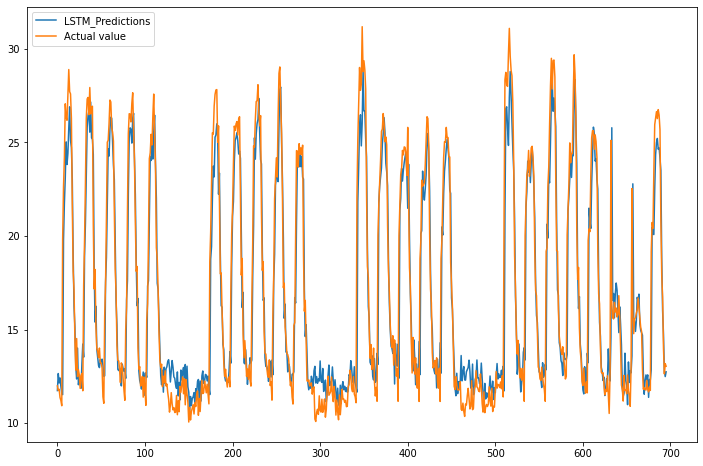

In [26]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [27]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([11.99]), array([11.740341], dtype=float32))

In [28]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.24965881]), array([-0.90049648]), array([-0.33738846]), array([-1.04557312]), array([-0.75095562]), array([-0.64400703]), array([8.26695923]), array([2.83176888]), array([2.42725151]), array([3.96122414]), array([1.32456932]), array([2.36326187]), array([3.16643745]), array([3.13746513]), array([0.81349846]), array([2.48955521]), array([1.56323151]), array([-1.26926254]), array([-0.92441429]), array([0.87127838]), array([-0.66388084]), array([-0.17998402]), array([2.16160633]), array([-1.52243019]), array([0.79663715]), array([0.21970661]), array([-0.32935776]), array([0.68559055]), array([-0.51178989]), array([-2.49755909]), array([3.81394657]), array([0.88140083]), array([2.09167885]), array([3.06307152]), array([1.51225121]), array([0.96204605]), array([-0.19952156]), array([2.38197678]), array([-0.63470123]), array([1.61725555]), array([1.76968353]), array([-3.71985733]), array([-1.15578278]), array([2.81139942]), array([-1.08860954]), array([0.05955959]), array([0.331996

In [29]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([10.50973545]), array([-9.40227425]))

In [30]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [31]:
len(neg),len(pos)

(355, 341)